# Faceting with seaborn

<table>
<tr>
<td><img src="https://i.imgur.com/wU9M9gu.png" width="350px"/></td>
<td><img src="https://i.imgur.com/85d2nIj.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Facet Grid</td>
<td style="font-weight:bold; font-size:16px;">Pair Plot</td>
</tr>
<tr>
<td>sns.FacetGrid()</td>
<td>sns.pairplot()</td>
</tr>
<tr>
<td>Good for data with at least two categorical variables.</td>
<td>Good for exploring most kinds of data.</td>
</tr>
</table>

So far in this tutorial we've been plotting data in one (univariate) or two (bivariate) dimensions, and we've learned how plotting in `seaborn` works. In this section we'll dive deeper into `seaborn` by exploring **faceting**.

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.

In this notebook we'll put this technique in action, and see why it's so useful.

In [15]:
import re
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('max_columns', None)

In [4]:
df = pd.read_csv('./data/fifa-18-demo-player-dataset/CompleteDataset.csv', index_col=0)

/home/wb/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
footballers = df.copy()

In [6]:
footballers['Unit'] = df['Value'].str[-1]

In [8]:
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))

In [10]:
footballers['Value (M)'] = footballers['Value (M)'].astype(float)

In [11]:
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)

In [13]:
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

In [14]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


# The FacetGrid

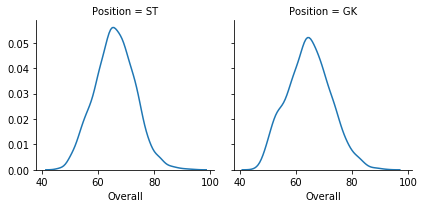

In [19]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")
g.map(sns.kdeplot, "Overall")
# 从下图可以看出，在Strikers 和 Goalkeepers 两个位置上的球员，overall总体实力分布对比
# map的两个参数，前者是绘图函数名称，后者是统计的字段名称

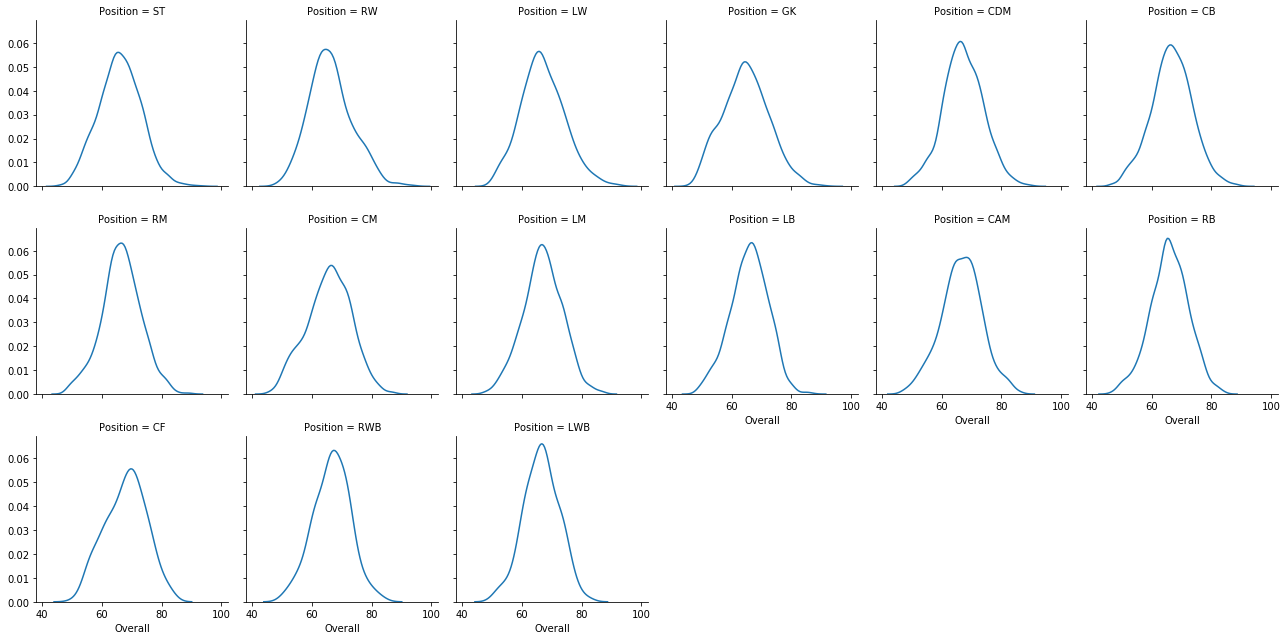

In [21]:
# 如果我想展示所有position的overall数据对比, col_wrap=6 表示只显示6列
df = footballers
g = sns.FacetGrid(df, col='Position', col_wrap=6)
g.map(sns.kdeplot, 'Overall')

/home/wb/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


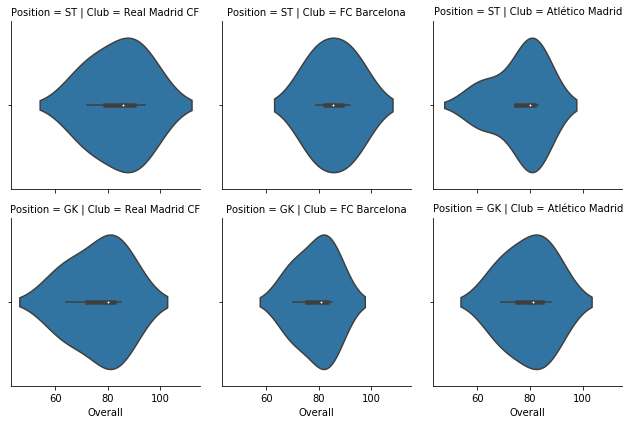

In [24]:
# 我们还想看看三个俱乐部的ST和GK两个位置的Overall实力对比，相当于展示三维数据对比
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row='Position', col='Club')
g.map(sns.violinplot, 'Overall')

/home/wb/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


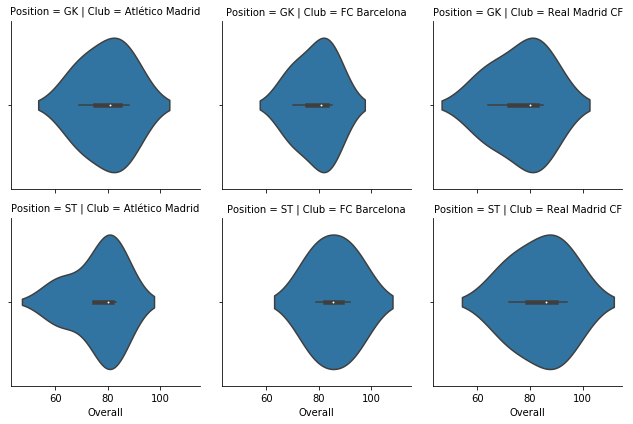

In [25]:
# 还可以指定行、列 每个类别的展示顺序
g = sns.FacetGrid(df, row='Position', col='Club', row_order=['GK', 'ST'], col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])
g.map(sns.violinplot, 'Overall')

**Facet Grid局限性**

- 1、行、列数量不能太多，太多了图很小，看不清
- 2、行、列都需要是类别型数据

# Pairplot --- 两两相关性图 看下三角就行

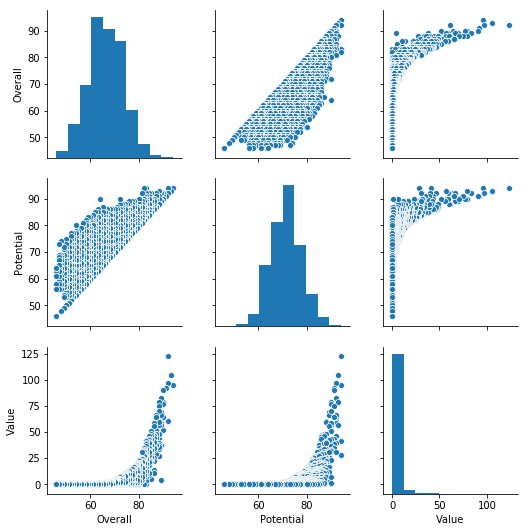

In [26]:
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])

# 练习

In [27]:
pokemon = pd.read_csv('./data/pokemon/Pokemon2.csv', index_col=0)

In [28]:
pokemon.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


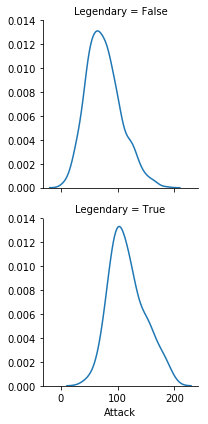

In [29]:
g = sns.FacetGrid(pokemon, row='Legendary')
g.map(sns.kdeplot, 'Attack')

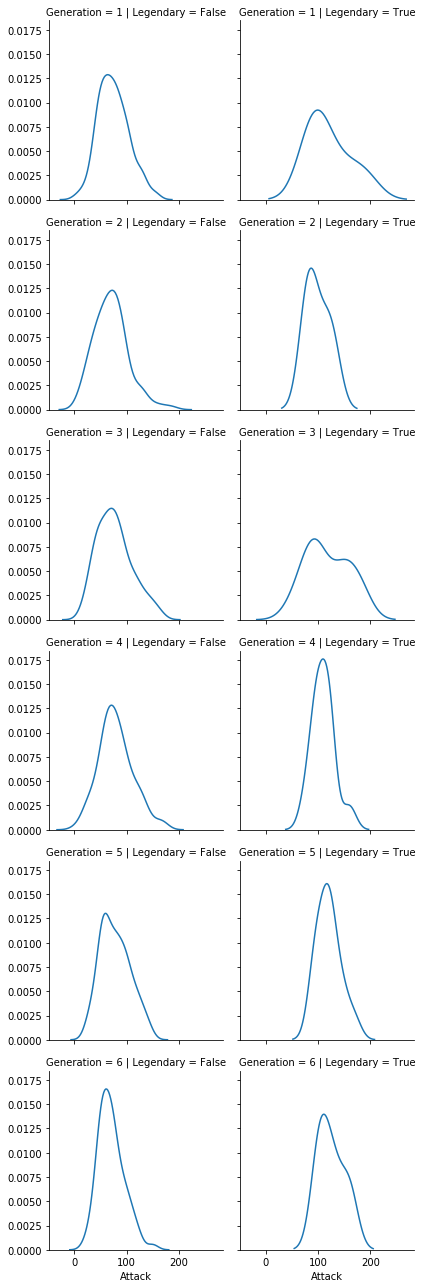

In [30]:
g = sns.FacetGrid(pokemon, row='Generation', col='Legendary')
g.map(sns.kdeplot, 'Attack')

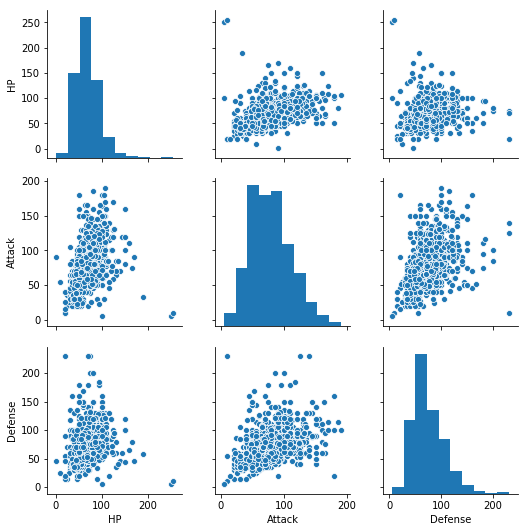

In [31]:
g = sns.pairplot(pokemon[['HP', 'Attack', 'Defense']])

# 总结：多维数据分析第一步就是这两个图